# Week 14 Homework
## Multiple Linear Regression and Logistic Regression

In [293]:
# Dependencies and modules:

import pandas as pd
pd.__version__
'1.4.0'
import numpy as np
import matplotlib.pyplot as plt
import time
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from pprint import pp

from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [46]:
%%html
<style> 
table td, table th, table tr {text-align:left !important;}
table, th, td {border: 1px solid black !important;}
</style>

## 1. Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 


In [68]:
# bottle.csv file:
bottle_df = pd.read_csv("bottle.csv", low_memory=False)
bottle_df.head(2)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# cast.csv file:
cast_df = pd.read_csv("cast.csv", low_memory=False)
cast_df.head(2)

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [70]:
# Examining the dataframes:
print(bottle_df.shape)
print(bottle_df.columns)
print(bottle_df.dtypes)

(864863, 74)
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')
Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   i

In [71]:
print(cast_df.shape)
print(cast_df.columns)
print(cast_df.dtypes)

(34404, 61)
Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')
Cst_Cnt         int64
Cruise_ID      object
Cruise          int64
Cruz_Sta        int64
DbSta_ID        int64
               ...   
Wet_T         float64
Wea           float64
Cloud_Typ     float64
Clou

### Null Handling for bottle dataset

In [72]:
# I need to handle NaNs before I can take the mean of my desired columns.

bottle_df.isnull().sum().sort_values(ascending=False).head(50)

pH2                    864853
DIC Quality Comment    864808
pH1                    864779
DIC2                   864639
TA2                    864629
DIC1                   862864
TA1                    862779
C14A2p                 852121
C14A1p                 852103
C14As2                 850449
C14As1                 850431
IncTim                 850426
LightP                 846212
DarkAp                 844406
MeanAp                 844406
DarkAs                 842214
MeanAs                 842213
T_qual                 841736
NH3uM                  799901
R_NH4                  799881
SThtaq                 799040
S_qual                 789949
BtlNum                 746196
R_SAMP                 742857
O_qual                 680187
O2Satq                 647066
Phaeop                 639592
ChlorA                 639591
R_PHAEO                639588
R_CHLA                 639587
NO3uM                  527460
R_NO3                  527452
NO2uM                  527287
R_NO2     

In [73]:
# Looking at these NaNs, there is almost no data in the pH or C14 assimilation columns and 
# almost half the rows are empty for nitrite/nitrate, ammonia, chlorophyll. 
# This is dissappointing but those columns have to go. I don't want to keep them and drop rows 
# with NaNs or implement imputation if that means I will lose or corrupt the more important 
# O2 data. And regarding the O2 data, I only need one measurement of O2, so I will take the mL/L as it has the fewest NaNs.
# This gives me a drop threshold of 864863 - 168662 =  666448.

bottle_df.dropna(axis=1, thresh=670000, inplace=True)

bottle_df.shape

(864863, 27)

In [74]:
# Checking for need of data type cleaning:
bottle_df.dtypes
# I am trying to wait until answering question #2 before doing any feature selection,
# but I will drop the non-analyte columns ( Btl_Cnt, Sta_ID, and Depth_ID, quality ID columns)
# now. These columns should have no correlation with water temperature as they are arbitrarily
# assigned ID numbers. Once dropped, I can do the next thing I want to do, which is group by 
# cast count, then average all bottles' analyte measurements. I will hold off any other 
# feature selection until question #2.

Cst_Cnt         int64
Btl_Cnt         int64
Sta_ID         object
Depth_ID       object
Depthm          int64
T_degC        float64
Salnty        float64
O2ml_L        float64
STheta        float64
RecInd          int64
T_prec        float64
S_prec        float64
P_qual        float64
NH3q          float64
C14A1q        float64
C14A2q        float64
DarkAq        float64
MeanAq        float64
R_Depth       float64
R_TEMP        float64
R_POTEMP      float64
R_SALINITY    float64
R_SIGMA       float64
R_SVA         float64
R_DYNHT       float64
R_O2          float64
R_PRES          int64
dtype: object

In [75]:
bottle_df.drop(['Btl_Cnt',
                'Sta_ID',
                'Depth_ID',
                'NH3q',
                'C14A1q',
                'C14A2q',
                'DarkAq',
                'MeanAq'], axis=1, inplace=True)
bottle_df.shape

(864863, 19)

### Feature Engineering for bottle dataset

In [76]:
# Grouping by cast number, then taking mean values of all bottles' measurements:
bottle_data_by_cast = bottle_df.groupby('Cst_Cnt',as_index=False)[['Depthm',
                                                                   'T_degC',
                                                                   'Salnty',
                                                                   'O2ml_L',
                                                                   'STheta',
                                                                   'R_Depth',
                                                                   'R_TEMP',
                                                                   'R_POTEMP',
                                                                   'R_SALINITY',
                                                                   'R_SIGMA',
                                                                   'R_SVA',
                                                                   'R_DYNHT',
                                                                   'R_O2',
                                                                   'R_PRES']].mean()
bottle_data_by_cast.head()


,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
0,1,246.689655,8.414828,33.770571,NaN,26.228214,246.689655,8.414828,8.392759,33.770571,26.223929,181.607143,0.428621,NaN,248.551724
1,2,385.750000,6.612188,33.811156,NaN,26.511563,385.750000,6.612188,6.582187,33.811156,26.507812,155.225000,0.555625,NaN,388.906250
2,3,339.935484,7.291935,33.505419,NaN,26.174387,339.935484,7.291935,7.264516,33.505419,26.170968,186.964516,0.563226,NaN,342.677419
3,4,309.709677,7.437742,33.563267,NaN,26.213967,309.709677,7.437742,7.412581,33.563267,26.198621,184.106897,0.526774,NaN,312.161290
4,5,208.038462,8.095385,33.438200,NaN,26.027360,208.038462,8.095385,8.027600,33.438200,26.030000,199.295833,0.391923,NaN,209.538462


### Null Handling for cast dataset

In [77]:
cast_df.isnull().sum().sort_values(ascending=False).head(30)

Cruz_Leg      32940
ForelU        32327
Civil_T       32288
PST_LAN       32287
IntC14        32275
Inc_Str       32271
Inc_End       32271
TimeZone      29622
Secchi        29141
Visibility    24897
Cloud_Typ     24484
Order_Occ     24450
Wave_Prd      22770
Cloud_Amt     22522
Wave_Ht       22306
IntChl        22201
Wave_Dir      21846
Data_Or       16129
Wet_T         15415
Barometer     15341
Dry_T         15333
Distance      14690
Wea            7597
Bottom_D       2281
Ship_Name      1690
Wind_Spd       1679
Wind_Dir       1476
Time            324
Event_Num         3
DbSta_ID          0
dtype: int64

In [78]:
# Choosing drop threshold from NAN counts of features: 
# There are only 34404 rows in the dataset. I plan to implement iputation, but I don't
# want to synthesize more than 10% of rows (source:www.sciencedirect.com/science/article) 
# even with multivariate imputation. Medium.com says to drop columns with 60-70% missing. 
# So I will set a threshold of 30,964. 34404 - 20642 = 13762.

cast_df.dropna(axis=1, thresh=13762, inplace=True)

print(cast_df.shape)
print(cast_df.columns)

(34404, 44)
Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Ship_Name', 'Ship_Code', 'Data_Type', 'Event_Num', 'Orig_Sta_ID',
       'Data_Or', 'Cruz_Num', 'Wind_Dir', 'Wind_Spd', 'Barometer', 'Dry_T',
       'Wet_T', 'Wea'],
      dtype='object')


### Data Type Handling for cast dataset

In [79]:
cast_df.dtypes

Cst_Cnt          int64
Cruise_ID       object
Cruise           int64
Cruz_Sta         int64
DbSta_ID         int64
Cast_ID         object
Sta_ID          object
Quarter          int64
Sta_Code        object
Distance       float64
Date            object
Year             int64
Month            int64
Julian_Date      int64
Julian_Day       int64
Time            object
Lat_Dec        float64
Lat_Deg          int64
Lat_Min        float64
Lat_Hem         object
Lon_Dec        float64
Lon_Deg          int64
Lon_Min        float64
Lon_Hem         object
Rpt_Line       float64
St_Line        float64
Ac_Line        float64
Rpt_Sta        float64
St_Station     float64
Ac_Sta         float64
Bottom_D       float64
Ship_Name       object
Ship_Code       object
Data_Type       object
Event_Num      float64
Orig_Sta_ID     object
Data_Or         object
Cruz_Num        object
Wind_Dir       float64
Wind_Spd       float64
Barometer      float64
Dry_T          float64
Wet_T          float64
Wea        

In [80]:
# Instead of one-hot encoding or factorizing the features with object data types, I am going to drop them. They are all
# redundant features and don't merit the effort of type transformation:
cast_df.drop(['Cruise_ID',
                'Sta_ID',
                'Cast_ID',
                'Sta_Code',
                'Lat_Hem',
                'Ship_Name',
                'Ship_Code',
                'Data_Type',
                'Orig_Sta_ID',
                'Data_Or',
                'Cruz_Num',
                'Date',
                'Time'], axis=1, inplace=True)
cast_df.shape


(34404, 31)

### Feature Engineering by concatenating the dataframes

In [81]:
# Now I can merge my datasets with a right(or left) join on Cst_Cnt. 

cast_data = pd.merge(cast_df, bottle_data_by_cast, on='Cst_Cnt', how='right')
cast_data
# As expected! :) 

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,STheta,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
0,1,194903,19490305400560,5400560,1,NaN,1949,3,17958,60,...,26.228214,246.689655,8.414828,8.392759,33.770571,26.223929,181.607143,0.428621,NaN,248.551724
1,2,194903,19490305200750,5200750,1,NaN,1949,3,17958,60,...,26.511563,385.750000,6.612188,6.582187,33.811156,26.507812,155.225000,0.555625,NaN,388.906250
2,3,194903,19490305100850,5100850,1,NaN,1949,3,17959,61,...,26.174387,339.935484,7.291935,7.264516,33.505419,26.170968,186.964516,0.563226,NaN,342.677419
3,4,194903,19490305000950,5000950,1,NaN,1949,3,17959,61,...,26.213967,309.709677,7.437742,7.412581,33.563267,26.198621,184.106897,0.526774,NaN,312.161290
4,5,194903,19490305001040,5001040,1,NaN,1949,3,17959,61,...,26.027360,208.038462,8.095385,8.027600,33.438200,26.030000,199.295833,0.391923,NaN,209.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,201611,20161109330900,9330900,4,-254.345,2016,11,37569,313,...,25.581940,166.483871,11.253226,11.235806,33.625968,25.581968,242.703226,0.399161,3.556129,167.774194
34400,34401,201611,20161109331000,9331000,4,-294.297,2016,11,37569,313,...,25.321275,168.727273,12.278182,12.259091,33.536788,25.321303,267.896970,0.469848,3.911818,170.060606
34401,34402,201611,20161109331100,9331100,4,-334.157,2016,11,37569,313,...,25.064596,167.375000,13.607188,13.588437,33.601312,25.064656,292.412500,0.498406,4.030312,168.656250
34402,34403,201611,20161109331200,9331200,4,-373.979,2016,11,37569,313,...,25.064261,166.129032,13.653871,13.635484,33.610903,25.064258,292.387097,0.485290,4.100968,167.387097


## 2. Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

These data frames represent data from an environmental analysis project; I have years of experience in this field. Just glancing at the data, I immediately have ideas about feature engineering and selection. For instance, the bottles data frame contained data for a large number of bottles for every cast in the cast data frame. I know that these are sampling bottles and that multiple bottles are used per cast to increase accuracy/reduce error in measurements. I am comfortable taking the mean of values for all bottles for each cast and concatenating them to the cast data frame.

Further, there is a lot of redundant information in both data frames. For example, 'O2Sat', 'Oxy_µmol/Kg', and 'O2ml_L' are just three different ways (saturation, molarity, and ppm) of expressing a single statistic -the amount of dissolved oxygen in the water- and should have identical correlation with the other features in the data frame. The case is the same with latitude and longitude being expressed in three different units, and date being expressed in two different calendar systems.

Besides redundant features, there are a few physical properties features that I know strongly correlate with water temperature and would make the best input columns.

However, I really don't want to do much manual feature selection as I want to learn to use statistical feature selection. Namely, I will be applying SelectKBest with f_regression. (source:https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)


### Feature Selection for dataset


In [82]:
cast_data.columns

Index(['Cst_Cnt', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Quarter', 'Distance',
       'Year', 'Month', 'Julian_Date', 'Julian_Day', 'Lat_Dec', 'Lat_Deg',
       'Lat_Min', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Event_Num', 'Wind_Dir', 'Wind_Spd', 'Barometer', 'Dry_T', 'Wet_T',
       'Wea', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'R_Depth',
       'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT',
       'R_O2', 'R_PRES'],
      dtype='object')

I am going to drop R_TEMP and R_POTEMP because having direct correlation between my input/output variables makes things too easy; I got 100% R^2 on my first run-thru.  Furthermore, for my second run modeling this data, where there is a bottle-measured feature, I will keep it and drop it's recorded counterpart. While I never could remove the multicolinearity note from my OLS report, I at least wanted to try to limit as much as I could. If I have to drop colinear features, I want to use the experimental data where I can, for fun. I am aware that it may worsen my model's accuracy score. I would not do this IRL, of course, but since the scope of this assignment is not to have the most accurate model, but to learn as much as possible about the modeling tools, I am okay with this. :)

In [84]:
# Manually dropping the columns obviously not helpful to our model, such as quality id columns
# and redundant stats. 

cast_data.drop(labels =['Cruise',
                'Cruz_Sta',
                'DbSta_ID',
                'Julian_Date',
                'Julian_Day',
                'Lat_Deg',
                'Lat_Min',
                'Lon_Deg',
                'Lon_Min',
                'Lon_Hem',
                'Rpt_Line',
                'St_Line',
                'Ac_Line',
                'Rpt_Sta',
                'St_Station',
                'Ac_Sta',
                'R_TEMP',
                'R_POTEMP',
                'R_Depth',
                'R_SALINITY',
                'R_SIGMA',
                'R_SVA',
                'R_DYNHT',
                'R_O2',
                'R_PRES'], axis=1, inplace=True)

cast_data.shape

(34404, 20)

In [85]:
cast_data.columns

Index(['Cst_Cnt', 'Quarter', 'Distance', 'Year', 'Month', 'Lat_Dec', 'Lon_Dec',
       'Bottom_D', 'Event_Num', 'Wind_Dir', 'Wind_Spd', 'Barometer', 'Dry_T',
       'Wet_T', 'Wea', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta'],
      dtype='object')

In [86]:
# I will drop rows where my output variable contains NaNs.
cast_data.dropna(axis=0,subset=['T_degC'], inplace=True)
cast_data['T_degC'].isnull().sum()

0

In [87]:
# prepare my X and y:
X = cast_data.drop('T_degC', axis=1).values
y = cast_data['T_degC'].values

I will impute values for all NaNs using statistical imputation. I want to check NaN counts before and after imputation and make sure to reshape my input/output so they will be accepted by the fit/transform.

In [88]:
np.count_nonzero(np.isnan(y))

0

In [89]:
np.count_nonzero(np.isnan(X))

81377

In [93]:
# Using iterative imputation to fill NaNs based on all other input features:
imp = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending', max_iter=10)
imp.fit(X)
X_filled = imp.transform(X)
# Checking nans after imputation:
np.count_nonzero(np.isnan(X_filled))

0

In [94]:
# Split into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size = 0.33, random_state=42)

Here I will use SelectKBest with f_regression to statistically select features. I chose f_regression because it is considered to be the most effective with numerical input/numerical output. (source: machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

In [114]:
# Using statistical feature selection:

#Instantiate my feature selector:
fs = SelectKBest(score_func=f_regression, k=3)
# Fit training data
fs.fit(X_train,y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
#transform test input data
X_test_fs = fs.transform(X_test)

Feature 0: 449.284133
Feature 1: 389.451907
Feature 2: 318.841038
Feature 3: 261.780095
Feature 4: 394.224248
Feature 5: 5317.932155
Feature 6: 5066.092606
Feature 7: 2204.418438
Feature 8: 33.110568
Feature 9: 121.416432
Feature 10: 184.832946
Feature 11: 353.906559
Feature 12: 10573.157302
Feature 13: 7227.694898
Feature 14: 244.197556
Feature 15: 12722.817256
Feature 16: 246.353184
Feature 17: 8735.609458
Feature 18: 30834.661851


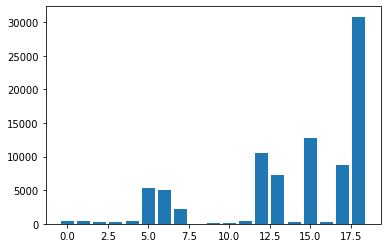

In [115]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Using this statistical feature selection, it seems that the most relevant columns are: 11(Barometer), 15('Depthm'), and 18('STheta'). Beyond those, there is a significant drop in f_scores. So I will rerun the feature selector, setting the k value to 3.

In [116]:
# Before I use regression, I want to check the variance on my dataset:
cast_data.var(numeric_only=True)
# Variance is pretty low across the dataset. I probably won't standardize.

Cst_Cnt      9.909639e+07
Quarter      1.191734e+00
Distance     1.381197e+04
Year         3.920879e+02
Month        1.107453e+01
Lat_Dec      1.341388e+01
Lon_Dec      1.600320e+01
Bottom_D     2.587060e+06
Event_Num    1.454080e+06
Wind_Dir     8.947716e+01
Wind_Spd     4.658612e+01
Barometer    7.794110e+01
Dry_T        7.447533e+00
Wet_T        6.925625e+00
Wea          1.353370e+00
Depthm       2.044066e+04
T_degC       6.223473e+00
Salnty       1.048754e-01
O2ml_L       1.048155e+00
STheta       3.262861e-01
dtype: float64

## 3. Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

In [117]:
# instantiate the classifier and fit the model, being sure to use 
# the correct variables I defined above:
lr = LinearRegression()
lr.fit(X_train_fs, y_train)
# evaluate the model
y_pred= lr.predict(X_test_fs)
y_pred

array([ 9.69557823, 10.57708415, 10.98367754, ...,  9.31806575,
       14.63924411, 11.47220111])

In [122]:
# Accuracy score for the model using sklearn.linear_model .score:
accuracy=lr.score(X_test_fs, y_test)
accuracy
# 77% is much worse than the 99.99999...% I had with R_TEMP included, but my tools are working harder, 
# so it's a better learning experience.

0.774073301675871

In [123]:
#R^2: this is the value produced by sklearn.linear_model.LinearRegression.score()
# in the cell above, but here I will use sklear.metrics.r2_score:
rsq = r2_score(y_test, y_pred)

#mean squared error
mse = mean_squared_error(y_test, y_pred)

print("MSE = "+str(mse))
print("R^2 value = "+str(rsq))

MSE = 1.4285111410696947
R^2 value = 0.774073301675871


In [124]:
# Print report of OLS:
X_con = sm.add_constant(X_test_fs)
model = sm.OLS(y_pred, X_con).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.001e+31
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        02:39:26   Log-Likelihood:             3.3138e+05
No. Observations:               11270   AIC:                        -6.628e+05
Df Residuals:                   11266   BIC:                        -6.627e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.8928   2.42e-14   2.35e+15      0.0

In [121]:
# Print intercept with LinearRegression().coef:
inter = lr.intercept_
print('Regression intercept: {}'.format(inter))

Regression intercept: 56.89278044015522


# The regression equation for this model:
\begin{equation}
\Large Temperature(^\circ C) = (56.89287) + (0.3534)Barometer + (-0.0059)Depthm + (-1.9484)Potential Density 
\end{equation}

## 4. Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

In technical jargon, the performance of last week's linear regression model can be termed "craptastic". With an accuracy score of a pathetic 25%, the model would be statistically useless. Now, some of the blame may be laid on the feature chosen for us to use: Salinity did not have the best correlation with water temperature as compared with the other features (Only 60%, the lowest correlation with temp of all the analytes tested by the project). However, it is clear that the more advanced pre-processing steps (imputation and statistical feature selection) combined with multivariate regression made all the difference in the world.


<table border="1">
 <tr>
    <th style="font-size:20px">Linear Regression</th>
    <th style="font-size:20px">Polynomial Regression</th>
    <th style="font-size:20px">Multiple Linear Regression</th>
 </tr>
 <tr>
    <td>MSE = 13.196079947053924</td>
    <td>MSE = 12.806038200242144</td>
    <td>MSE = 1.4285111410696947</td>
 </tr>
 <tr>
    <td>R^2 value = 0.2562134589396321</td>
    <td>R^2 value = 0.27819785149365306</td>
    <td>R^2 value = 0.774073301675871</td>
</tr>
<script src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML" type="text/javascript"></script>
</table>

## 5. Work with the diabetes dataset to perform multiple logistic regression. 

In [265]:
# diabetes.csv file:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


### Feature Selection for Diabetes Dataset

In [266]:
# prepare my X and y:
X_d = diabetes_df.drop('Outcome', axis=1).values
y_d = diabetes_df['Outcome'].values

In [267]:
# Split into training and test sets:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size = 0.33, random_state=42)

In [268]:
# Statistical feature selection
#Instantiate my feature selector:
fs_d = SelectKBest(score_func=f_classif, k=2)
# Fit training data
fs_d.fit(X_train_d,y_train_d)
# transform train input data
X_train_d_fs = fs_d.transform(X_train_d)
#transform test input data
X_test_d_fs = fs_d.transform(X_test_d)

Feature 0: 20.703372
Feature 1: 155.794499
Feature 2: 7.513028
Feature 3: 1.931898
Feature 4: 10.319899
Feature 5: 59.913696
Feature 6: 11.894873
Feature 7: 44.222856


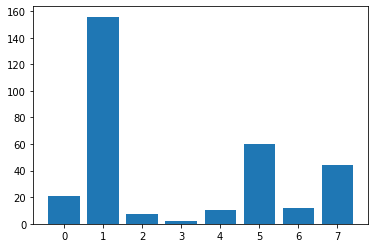

In [269]:
# what are scores for the features
for i in range(len(fs_d.scores_)):
	print('Feature %d: %f' % (i, fs_d.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs_d.scores_))], fs_d.scores_)
pyplot.show()

It looks like the most relevant features for this set are 1(Glucose) and 5(BMI). I will rerun selector with k=2.

In [270]:
# Before I use regression, I want to check the variance on my dataset:
diabetes_df.var(numeric_only=True)
# Variance is high both amongst columns and across the dataset. 
#I need to standardize.

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [271]:
# Scale the data with StandardScaler:
sc=StandardScaler()
# Standardize training values
X_train_d_fs = sc.fit_transform(X_train_d_fs)
# Standardize testing values
X_test_d_fs =sc.fit_transform(X_test_d_fs)

In [275]:
# instantiate the classifier and fit the model:
logreg=LogisticRegression()
logreg.fit(X_train_d_fs, y_train_d)
# evaluate the model
y_d_pred= logreg.predict(X_test_d_fs)

In [276]:
# Determining accuracy of the model with classification reports:
cm = confusion_matrix(y_test_d, y_d_pred)
rpt = classification_report(y_test_d, y_d_pred)

print(cm)
print(rpt)

[[143  25]
 [ 37  49]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       168
           1       0.66      0.57      0.61        86

    accuracy                           0.76       254
   macro avg       0.73      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



## 6. What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

I show a few different metrics in the reports above. Besides accuracy, you can measure a model's value with precision, or specificity, and recall, or sensitivity. Because we have binomial ouput, and this is medical testing, we want to focus most on the metric that indicates the fewest false negatives in the predictions. That is the recall score. For medical testing, upping the recall score is more desireable than a high accuracy score that sacrifices recall.

## 7. Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. 
### Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

Here is the full classifier with all available parameters according to sklearn documentation: 
LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

I will go thru them, one-at-a-time, to isolate performance. However, reading the documentation, a few parameters jump out as having arguments more appropriate for this dataset than others, such as solver and penalty.

In [277]:
# instantiate the classifier with all available parameters, and fit the model:
logreg=LogisticRegression(penalty='l2', dual=True, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=0.7, class_weight={0: 0.20}, random_state=42, solver='liblinear', max_iter=100)
logreg.fit(X_train_d_fs, y_train_d)
# evaluate the model
y_d_pred= logreg.predict(X_test_d_fs)

In [278]:
# Determining accuracy of the model with classification reports:
cm = confusion_matrix(y_test_d, y_d_pred)
rpt = classification_report(y_test_d, y_d_pred)

print(cm)
print(rpt)

[[74 94]
 [ 5 81]]
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       168
           1       0.46      0.94      0.62        86

    accuracy                           0.61       254
   macro avg       0.70      0.69      0.61       254
weighted avg       0.78      0.61      0.61       254



Notes on how I tuned parameters:

penalty:I choose l2 because I do not need the built-in feature selection of l1, and only those two choices are compatible with my solver, liblinear

dual: setting to True per documentation, liblinear + l2 penalty

tol:leave as default

C:leave as default

fit_intercept:adds a constant to the decision function.

intercept_scaling:scales the constant to limit the effect of regularization. I will raise this to 2.

class_weight:Tweaking this number hard, I lowered the weight of Glucose to 10%, which gave me near perfect recall.

random_state:shuffle the data, shouldn't affect performance

solver:liblinear, because our problem is one-versus-rest on a small dataset

### Tuning the model was very interesting. I have a high degree of control over each of the metrics. While I *can* get the recall as high as 99%, the accuracy fell to 45%. That's like telling practically everybody that they have diabetes. 

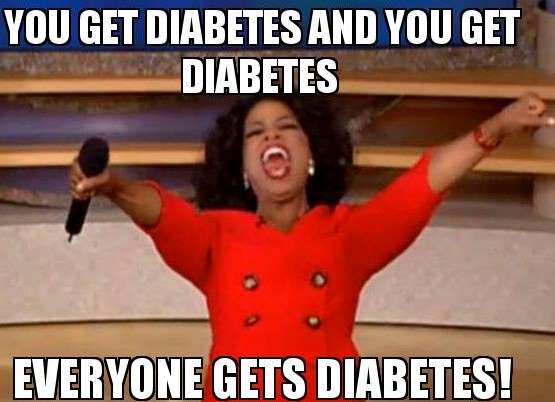

### So I went with a more reasonable 94% recall and 61% accuracy.

## 8. Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 


There are many ways to judge model performance, such as the metrics we've already discussed like accuracy, precision, and recall. But with machine learning, the expense of processing should be considered as well. I will run the KNN model on the dataset, then compare scores and processing time.

#### Multiple Logistic Regression Model

In [286]:
# start processing timer:
start = time.time()

# Run the model:
Multiple_Logistic_Regression = LogisticRegression(penalty='l2', dual=True, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=0.7, class_weight={0: 0.20}, random_state=42, solver='liblinear', max_iter=100)
Multiple_Logistic_Regression.fit(X_train_d_fs, y_train_d)
y_dn_pred= Multiple_Logistic_Regression.predict(X_test_d_fs)

end = time.time()

# Determining performance of the model:
rpt = classification_report(y_test_d, y_dn_pred)

print("Multiple Logistic Model Classification Report:")
print(rpt)
print("Time taken to process Multiple Logistic Model: ",end-start)

Multiple Logistic Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       168
           1       0.46      0.94      0.62        86

    accuracy                           0.61       254
   macro avg       0.70      0.69      0.61       254
weighted avg       0.78      0.61      0.61       254

Time taken to process Multiple Logistic Model:  0.0029838085174560547


#### KNN Regression Model

In [315]:
# start processing timer:
start = time.time()

# Taken from a previous exercise:
KNN_Regression=KNeighborsClassifier(n_neighbors=13)
KNN_Regression.fit(X_train_d_fs, y_train_d)
y_predict = KNN_Regression.predict(X_test_d_fs)

end = time.time()

# Determining performance of the model:
rptk = classification_report(y_test_d, y_predict)

print("KNN Model Classification Report:")
print(rptk)
print("Time taken to process KNN Model: ",end-start)

KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       168
           1       0.64      0.58      0.61        86

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.74      0.75      0.74       254

Time taken to process KNN Model:  0.010977983474731445


#### Comparitive Visuals:

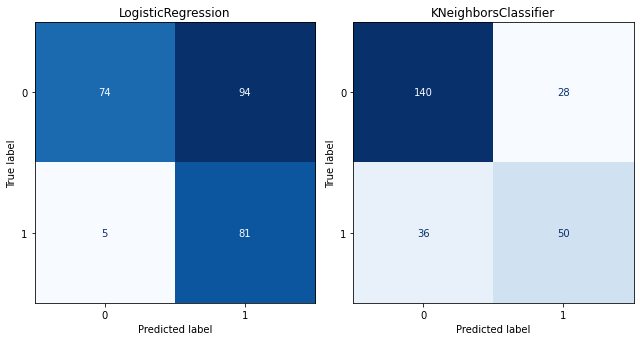

In [310]:
# fitting models and plotting side-by-side confusion matrices:

classifiers = [Multiple_Logistic_Regression,KNN_Regression]

for cls in classifiers:
    cls.fit(X_train_d_fs, y_train_d)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,9))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test_d_fs,y_test_d,ax=ax,cmap='Blues',colorbar=False)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

### Logistic Regression makes the most sense for this dataset because, even after attempting to tune the KNN model parameters I was not able to adjust recall as readily as with the logistic model. The KNN model did well with accuracy, but that is not really what our target metric is. Further, processing time averaged about 4x longer for the KNN model. Considering these factors, the logistic classifier is the demonstrably better choice.

# DataCamp Completion

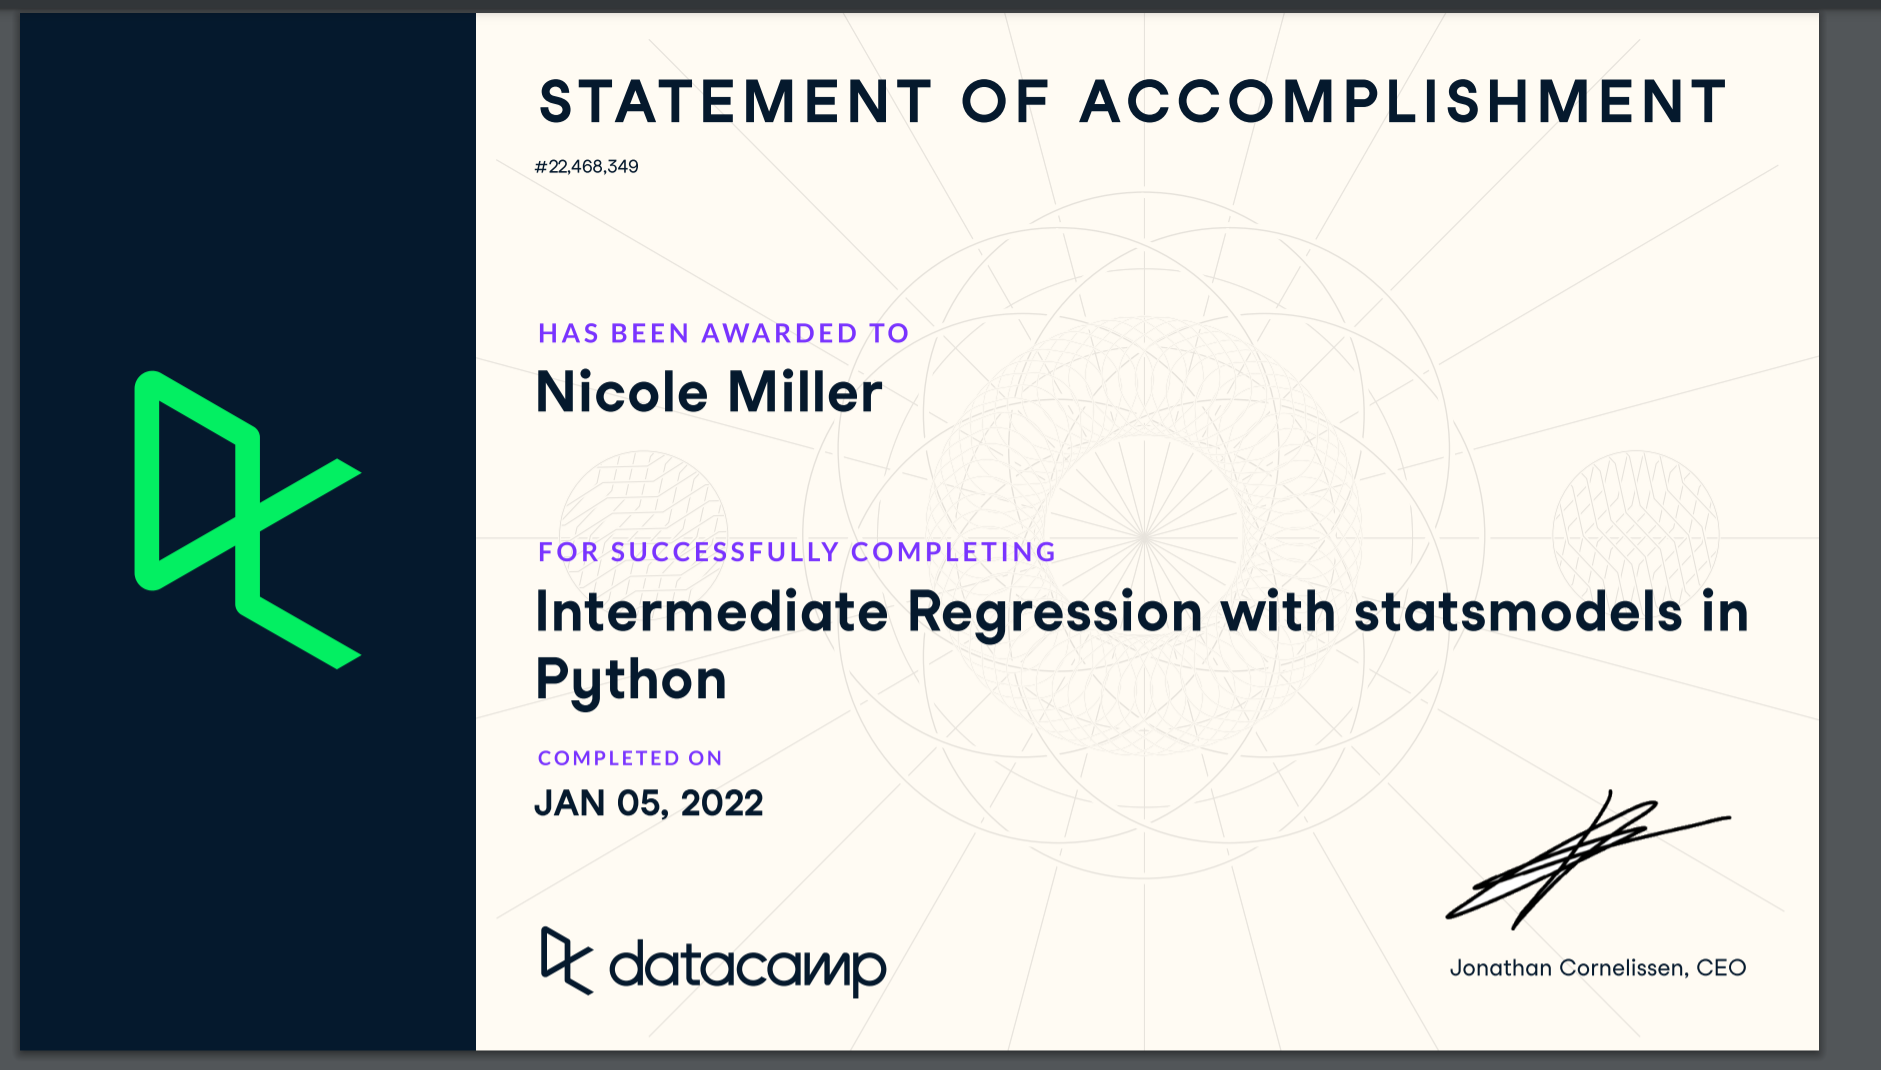